# Classification Model for Working mothers after pregnancy

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle

# Parameters Tuning with GridSearch

In [2]:
from sklearn.model_selection import GridSearchCV  #cv=cross validation
from sklearn.tree            import DecisionTreeClassifier
from sklearn.ensemble        import RandomForestClassifier
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.linear_model    import LogisticRegression
from sklearn.svm             import SVC
from sklearn.neural_network  import MLPClassifier

In [33]:
with open('data_mothers.pkl', mode = 'rb') as f:
    X_data_training, Y_data_training, X_data_predict = pickle.load(f)

In [34]:
X_data_training.shape, Y_data_training.shape, X_data_predict.shape

((979, 6), (979,), (264, 6))

In [67]:
np.unique(Y_data_training, return_counts=True)

(array([0., 1.]), array([388, 591], dtype=int64))

## Decision tree

In [35]:
parameters = {'criterion': ['gini','entropy'],
              'splitter': ['best','random'],
              'min_samples_split': [2,5,10],
              'min_samples_leaf' : [1,5,10]}

In [36]:
grid_search = GridSearchCV(estimator = DecisionTreeClassifier(),
                           param_grid = parameters) #it will test all combinations of parameters
grid_search.fit(X_data_training, Y_data_training)
best_parameters = grid_search.best_params_
best_result = grid_search.best_score_

In [37]:
print(best_parameters) , print(best_result)

{'criterion': 'gini', 'min_samples_leaf': 5, 'min_samples_split': 5, 'splitter': 'random'}
0.6710779696493983


(None, None)

## Random Forest

In [38]:
parameters = {'criterion': ['gini','entropy'],
              'n_estimators': [10,40,100,150],
              'min_samples_split': [2,5,10],
              'min_samples_leaf' : [1,5,10]}

In [39]:
grid_search = GridSearchCV(estimator = RandomForestClassifier(),
                           param_grid = parameters) #it will test all combinations of parameters
grid_search.fit(X_data_training, Y_data_training)
best_parameters = grid_search.best_params_
best_result = grid_search.best_score_

In [40]:
print(best_parameters) , print(best_result)

{'criterion': 'entropy', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 10}
0.6731344845630559


(None, None)

## KNN

In [41]:
parameters = {'n_neighbors': [3,5,10,20],
              'p': [1,2]}

In [42]:
grid_search = GridSearchCV(estimator = KNeighborsClassifier(),
                           param_grid = parameters) #it will test all combinations of parameters
grid_search.fit(X_data_training, Y_data_training)
best_parameters = grid_search.best_params_
best_result = grid_search.best_score_

In [43]:
print(best_parameters) , print(best_result)

{'n_neighbors': 20, 'p': 1}
0.678226059654631


(None, None)

## Logistic Regression

In [44]:
parameters = {'tol': [0.0001,0.00001,0.000001],
              'C': [1.0,1.5,2.0],
              'solver' :['lbfgs','sag','saga']}

In [45]:
grid_search = GridSearchCV(estimator = LogisticRegression(),
                           param_grid = parameters) #it will test all combinations of parameters
grid_search.fit(X_data_training,Y_data_training)
best_parameters = grid_search.best_params_
best_result = grid_search.best_score_

In [46]:
print(best_parameters) , print(best_result)

{'C': 1.0, 'solver': 'lbfgs', 'tol': 0.0001}
0.6730978545264259


(None, None)

## SVM

In [52]:
parameters = {'tol': [0.001,0.0001,0.00001],
              'C': [1.0,1.5,2.0],
              'kernel' :['rbf','linear','poly','sigmoid']}

In [53]:
grid_search = GridSearchCV(estimator = SVC(),
                           param_grid = parameters) #it will test all combinations of parameters
grid_search.fit(X_data_training,Y_data_training)
best_parameters = grid_search.best_params_
best_result = grid_search.best_score_

In [54]:
print(best_parameters) , print(best_result)

{'C': 2.0, 'kernel': 'rbf', 'tol': 0.001}
0.675149136577708


(None, None)

## Neural Network

In [49]:
parameters = {'activation': ['relu','logistic','tanh'],
              'solver': ['adam','sgd'],
              'batch_size' :[10,56]}

In [50]:
grid_search = GridSearchCV(estimator = MLPClassifier(),
                           param_grid = parameters) #it will test all combinations of parameters
grid_search.fit(X_data_training, Y_data_training)
best_parameters = grid_search.best_params_
best_result = grid_search.best_score_

C:\Users\ville\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ville\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ville\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ville\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.wa

In [51]:
print(best_parameters) , print(best_result)

{'activation': 'tanh', 'batch_size': 10, 'solver': 'adam'}
0.6741287284144428


(None, None)

# Cross Validation

In [56]:
from sklearn.model_selection import cross_val_score, KFold

In [57]:
dec_tree_results   = []
random_f_results   = []
knn_results        = []
logistic_results   = []
svm_results        = []
neural_net_results = []

for i in range(30): #30 is very common
    print(i)
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    #results found on Tuning with GridSearch
    #{'criterion': 'gini', 'min_samples_leaf': 5, 'min_samples_split': 5, 'splitter': 'random'}
    tree_decision = DecisionTreeClassifier(criterion='gini',
                                           min_samples_leaf=5,
                                           min_samples_split=5,
                                           splitter='random')
    score = cross_val_score(tree_decision,X_data_training,Y_data_training, cv=kfold)
    dec_tree_results.append(score.mean())
    ##################################################################################
    #{'criterion': 'entropy', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 10}
    random_f = RandomForestClassifier(criterion='entropy',
                                      min_samples_leaf=5,
                                      min_samples_split=2,
                                      n_estimators=10)
    score = cross_val_score(random_f,X_data_training,Y_data_training, cv=kfold)
    random_f_results.append(score.mean())
    ##################################################################################
    #{'n_neighbors': 20, 'p': 1}
    knn = KNeighborsClassifier(n_neighbors=20,
                               p = 1)
    score = cross_val_score(knn,X_data_training,Y_data_training, cv=kfold)
    knn_results.append(score.mean())
    ##################################################################################
    #{'C': 1.0, 'solver': 'lbfgs', 'tol': 0.0001}
    logistic = LogisticRegression(C=1.0,
                                  solver ='lbfgs',
                                  tol = 0.0001)
    score = cross_val_score(logistic,X_data_training,Y_data_training, cv=kfold)
    logistic_results.append(score.mean())
    ##################################################################################
    #{'C': 2.0, 'kernel': 'rbf', 'tol': 0.001}
    svm = SVC(C =2.0,
              kernel = 'rbf',
              tol = 0.001)
    score = cross_val_score(svm,X_data_training,Y_data_training, cv=kfold)
    svm_results.append(score.mean())
    ##################################################################################
    #{'activation': 'tanh', 'batch_size': 10, 'solver': 'adam'}
    neura_network = MLPClassifier(activation='tanh',
                                  batch_size= 10,
                                  solver= 'adam')
    score = cross_val_score(neura_network,X_data_training,Y_data_training, cv=kfold)
    neural_net_results.append(score.mean())

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [58]:
results = pd.DataFrame({"Decision Tree": dec_tree_results,
                        'Random Forest': random_f_results,
                        "KNN": knn_results,
                        "Logistic Regression": logistic_results,
                        'SVM': svm_results,
                        'Neural Network': neural_net_results
                        })
results

,Decision Tree,Random Forest,KNN,Logistic Regression,SVM,Neural Network
0,0.656775,0.680297,0.666021,0.662887,0.661887,0.663928
1,0.632369,0.647633,0.655817,0.662950,0.639470,0.672144
2,0.646560,0.654702,0.668010,0.665906,0.652640,0.664885
3,0.652609,0.648548,0.658763,0.667926,0.647517,0.666895
4,0.643551,0.659888,0.661940,0.669072,0.655849,0.666011
5,0.646550,0.655796,0.666979,0.677183,0.648601,0.674111
6,0.654713,0.663865,0.658784,0.675142,0.662908,0.671060
7,0.652661,0.658815,0.673101,0.671102,0.651641,0.668010
8,0.657753,0.664917,0.673070,0.669051,0.672123,0.669051
9,0.649684,0.652756,0.657816,0.666011,0.641542,0.673185


In [59]:
results.describe()

,Decision Tree,Random Forest,KNN,Logistic Regression,SVM,Neural Network
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.651878,0.656034,0.665291,0.667983,0.655592,0.668183
std,0.007031,0.007880,0.005311,0.004849,0.007874,0.004681
min,0.632369,0.640385,0.655817,0.659952,0.638428,0.656701
25%,0.646552,0.651873,0.661143,0.664133,0.652633,0.665987
50%,0.652635,0.654739,0.665969,0.667999,0.656754,0.668541
75%,0.656509,0.661624,0.668767,0.671860,0.660625,0.671813
max,0.665927,0.680297,0.675131,0.677183,0.672123,0.674206


# Normality test

In [60]:
from scipy.stats import shapiro

In [61]:
alpha = 0.05
shapiro(dec_tree_results), shapiro(random_f_results), shapiro(knn_results), shapiro(logistic_results), shapiro(svm_results), shapiro(neural_net_results)

(ShapiroResult(statistic=0.9756958057031239, pvalue=0.7032287341692791),
 ShapiroResult(statistic=0.953816962803476, pvalue=0.21368865381427982),
 ShapiroResult(statistic=0.9686306774828015, pvalue=0.5024204472982673),
 ShapiroResult(statistic=0.9617442286514929, pvalue=0.34299621275020814),
 ShapiroResult(statistic=0.9643838432106665, pvalue=0.3987946394238008),
 ShapiroResult(statistic=0.9356476429626401, pvalue=0.06948007508054126))

If p-value >= alpha, then we can NOT REJECT the null hypothesis (H0), aka, the sample have a normal distribution.

# Anova teste

In [62]:
from scipy.stats import f_oneway

In [63]:
p = f_oneway(dec_tree_results,random_f_results,knn_results,logistic_results,svm_results,neural_net_results)

alpha = 0.05
if p.pvalue <= alpha:
    print('H0 can be REJECTED. Aka, data is different or data mean is different.')
else:
    print('H0 can be NOT REJECTED. Aka, data is the same or mean of groups are the same.')

H0 can be REJECTED. Aka, data is different or data mean is different.


# Tukey teste

In [64]:
from statsmodels.stats.multicomp import MultiComparison

In [65]:
algorithm_results = {'accuracy': np.concatenate([dec_tree_results,random_f_results,knn_results,logistic_results,svm_results,neural_net_results]),
                     'algorithm': 
                     ['tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree',
                      'random_f','random_f','random_f','random_f','random_f','random_f','random_f','random_f','random_f','random_f','random_f','random_f','random_f','random_f','random_f','random_f','random_f','random_f','random_f','random_f','random_f','random_f','random_f','random_f','random_f','random_f','random_f','random_f','random_f','random_f',
                      'knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn',
                      'logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic',
                      'svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm',
                      'neural_net','neural_net','neural_net','neural_net','neural_net','neural_net','neural_net','neural_net','neural_net','neural_net','neural_net','neural_net','neural_net','neural_net','neural_net','neural_net','neural_net','neural_net','neural_net','neural_net','neural_net','neural_net','neural_net','neural_net','neural_net','neural_net','neural_net','neural_net','neural_net','neural_net']}

algorithm_results_df = pd.DataFrame(algorithm_results)
comparison = MultiComparison(algorithm_results_df['accuracy'],algorithm_results_df['algorithm'])

tukey_test = comparison.tukeyhsd()
print(tukey_test)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
       knn   logistic   0.0027 0.5839 -0.0021  0.0075  False
       knn neural_net   0.0029 0.5044 -0.0019  0.0077  False
       knn   random_f  -0.0093    0.0  -0.014 -0.0045   True
       knn        svm  -0.0097    0.0 -0.0145 -0.0049   True
       knn       tree  -0.0134    0.0 -0.0182 -0.0086   True
  logistic neural_net   0.0002    1.0 -0.0046   0.005  False
  logistic   random_f  -0.0119    0.0 -0.0167 -0.0072   True
  logistic        svm  -0.0124    0.0 -0.0172 -0.0076   True
  logistic       tree  -0.0161    0.0 -0.0209 -0.0113   True
neural_net   random_f  -0.0121    0.0 -0.0169 -0.0074   True
neural_net        svm  -0.0126    0.0 -0.0174 -0.0078   True
neural_net       tree  -0.0163    0.0 -0.0211 -0.0115   True
  random_f        svm  -0.0004 0.9998 -0.0052  0.0043  False
  random_f       tree  -

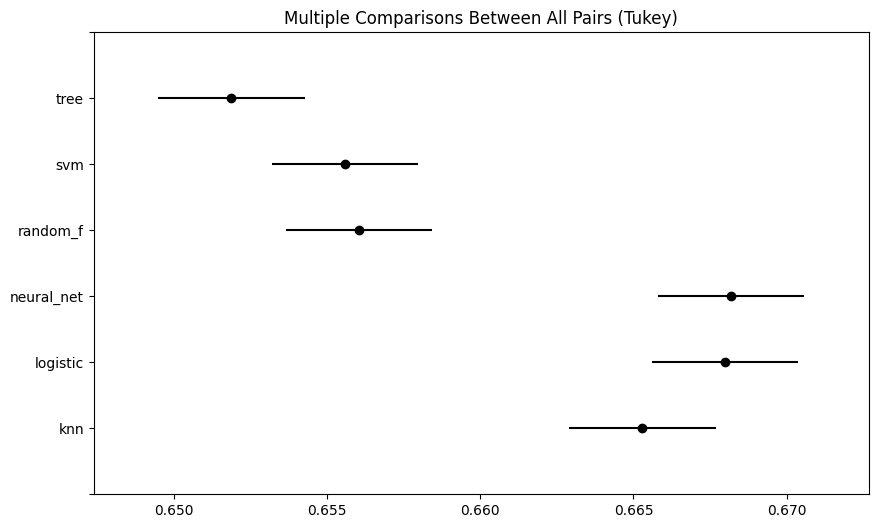

In [66]:
tukey_test.plot_simultaneous();